In [2]:
# # Unzip data
# import zipfile
# with zipfile.ZipFile(r"C:\Users\ChenDaoYuan\Desktop\2018-2020 SIT CS master\self study\ML DL\data\hw3\food-11.zip", 'r') as zip_ref:
#     zip_ref.extractall(r"C:\Users\ChenDaoYuan\Desktop\2018-2020 SIT CS master\self study\ML DL\CNN\Data")

In [1]:
import os
import shutil
import numpy as np
import cv2
import pandas as pd

In [3]:
# Try os

cur_dir = os.getcwd()
train_path = os.path.join(cur_dir, 'Data/food-11/training')
val_path = os.path.join(cur_dir, 'Data/food-11/validation')
test_path = os.path.join(cur_dir, 'Data/food-11/testing')
train_imgs = sorted(os.listdir(train_path))
val_imgs = sorted(os.listdir(val_path))

In [11]:
# # Create subfolder for each class

# train_classes = []
# val_classes = []
# for i, file in enumerate(train_imgs):
#     train_classes.append(int(file.split("_")[0]))
# train_classes = list(set(train_classes))

# for i, file in enumerate(val_imgs):
#     val_classes.append(int(file.split("_")[0]))
# val_classes = list(set(val_classes))
# # print(val_classes)

# for name in train_classes:
#     os.mkdir(train_path + '\\' + str(name))
    
# for name in val_classes:
#     os.mkdir(val_path + '\\' + str(name))
    

In [13]:
# # Move images into class folders
# for file in train_imgs:
#     if int(file.split("_")[0]) == 0:
#         shutil.move(train_path + '\\' + file, train_path + '\\0\\' + file)
#     elif int(file.split("_")[0]) == 1:
#         shutil.move(train_path + '\\' + file, train_path + '\\1\\' + file)
#     elif int(file.split("_")[0]) == 2:
#         shutil.move(train_path + '\\' + file, train_path + '\\2\\' + file)
#     elif int(file.split("_")[0]) == 3:
#         shutil.move(train_path + '\\' + file, train_path + '\\3\\' + file)
#     elif int(file.split("_")[0]) == 4:
#         shutil.move(train_path + '\\' + file, train_path + '\\4\\' + file)
#     elif int(file.split("_")[0]) == 5:
#         shutil.move(train_path + '\\' + file, train_path + '\\5\\' + file)
#     elif int(file.split("_")[0]) == 6:
#         shutil.move(train_path + '\\' + file, train_path + '\\6\\' + file)
#     elif int(file.split("_")[0]) == 7:
#         shutil.move(train_path + '\\' + file, train_path + '\\7\\' + file)
#     elif int(file.split("_")[0]) == 8:
#         shutil.move(train_path + '\\' + file, train_path + '\\8\\' + file)
#     elif int(file.split("_")[0]) == 9:
#         shutil.move(train_path + '\\' + file, train_path + '\\9\\' + file)
#     else:
#         shutil.move(train_path + '\\' + file, train_path + '\\10\\' + file)

# for file in val_imgs:
#     if int(file.split("_")[0]) == 0:
#         shutil.move(val_path + '\\' + file, val_path + '\\0\\' + file)
#     elif int(file.split("_")[0]) == 1:
#         shutil.move(val_path + '\\' + file, val_path + '\\1\\' + file)
#     elif int(file.split("_")[0]) == 2:
#         shutil.move(val_path + '\\' + file, val_path + '\\2\\' + file)
#     elif int(file.split("_")[0]) == 3:
#         shutil.move(val_path + '\\' + file, val_path + '\\3\\' + file)
#     elif int(file.split("_")[0]) == 4:
#         shutil.move(val_path + '\\' + file, val_path + '\\4\\' + file)
#     elif int(file.split("_")[0]) == 5:
#         shutil.move(val_path + '\\' + file, val_path + '\\5\\' + file)
#     elif int(file.split("_")[0]) == 6:
#         shutil.move(val_path + '\\' + file, val_path + '\\6\\' + file)
#     elif int(file.split("_")[0]) == 7:
#         shutil.move(val_path + '\\' + file, val_path + '\\7\\' + file)
#     elif int(file.split("_")[0]) == 8:
#         shutil.move(val_path + '\\' + file, val_path + '\\8\\' + file)
#     elif int(file.split("_")[0]) == 9:
#         shutil.move(val_path + '\\' + file, val_path + '\\9\\' + file)
#     else:
#         shutil.move(val_path + '\\' + file, val_path + '\\10\\' + file)

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    # This is the target directory
    train_path,
#     classes = train_y,
    # All images will be resized to 128x128
    target_size= (128, 128),
    batch_size= 20,
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    # This is the target directory
    val_path,
#     classes = val_y,
    # All images will be resized to 128x128
    target_size= (128, 128),
    batch_size= 20,
    # Since we use categorical_crossentropy loss, we need categorical labels
    class_mode='categorical'
)






Using TensorFlow backend.


Found 9866 images belonging to 11 classes.
Found 3430 images belonging to 11 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 128, 128, 3)
labels batch shape: (20, 11)


In [8]:
# Build CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.utils import np_utils

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#You can apply dropout here (before the layer with too many parameters)
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=11, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 57600)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)              

In [9]:
# specify optimization method, loss function, metric
model.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

In [10]:
# train CNN
history = model.fit_generator(
    train_generator,
    steps_per_epoch=500,
    epochs=10,
    validation_data=val_generator,
    validation_steps=200
)

Epoch 1/10
500/500 [==============================] - 481s 962ms/step - loss: 2.2621 - accuracy: 0.2169 - val_loss: 2.1536 - val_accuracy: 0.3213
Epoch 2/10
500/500 [==============================] - 382s 764ms/step - loss: 1.9191 - accuracy: 0.3250 - val_loss: 1.9511 - val_accuracy: 0.3737
Epoch 3/10
500/500 [==============================] - 412s 823ms/step - loss: 1.7641 - accuracy: 0.3883 - val_loss: 1.5940 - val_accuracy: 0.4025
Epoch 4/10
500/500 [==============================] - 410s 821ms/step - loss: 1.6417 - accuracy: 0.4307 - val_loss: 1.7814 - val_accuracy: 0.4313
Epoch 5/10
500/500 [==============================] - 400s 801ms/step - loss: 1.5445 - accuracy: 0.4728 - val_loss: 1.7709 - val_accuracy: 0.4549
Epoch 6/10
500/500 [==============================] - 393s 786ms/step - loss: 1.4249 - accuracy: 0.5045 - val_loss: 1.8059 - val_accuracy: 0.4835
Epoch 7/10
500/500 [==============================] - 406s 813ms/step - loss: 1.3272 - accuracy: 0.5402 - val_loss: 2.0459 -

In [11]:
# plot accuracy against epoch
from matplotlib import pyplot as plt

# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


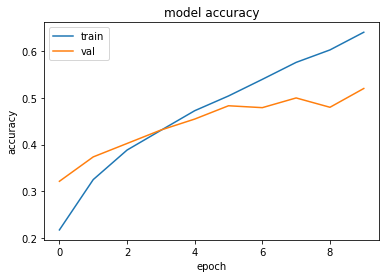

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

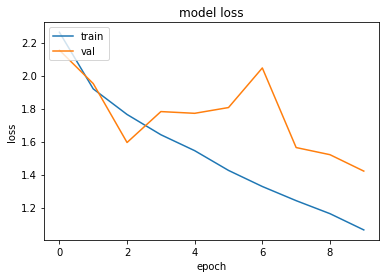

In [13]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
# test_0 = sorted(os.listdir(test_path))
# # test_0[0]
# img_test = cv2.imread(os.path.join(test_path, test_0[0]))
# img_test = cv2.resize(img_test,(128, 128))
# img_test = np.multiply(img_test, 1/255)
# img_test

array([[[0.00784314, 0.04705882, 0.04705882],
        [0.01960784, 0.05882353, 0.05882353],
        [0.01176471, 0.05098039, 0.05098039],
        ...,
        [0.05490196, 0.0627451 , 0.05882353],
        [0.03921569, 0.05882353, 0.05098039],
        [0.03921569, 0.06666667, 0.05882353]],

       [[0.02745098, 0.06666667, 0.06666667],
        [0.01568627, 0.05490196, 0.05490196],
        [0.01176471, 0.05098039, 0.05098039],
        ...,
        [0.05490196, 0.07843137, 0.08627451],
        [0.03529412, 0.07058824, 0.07058824],
        [0.03529412, 0.07058824, 0.06666667]],

       [[0.02352941, 0.0627451 , 0.0627451 ],
        [0.01176471, 0.05098039, 0.05098039],
        [0.01176471, 0.05098039, 0.05098039],
        ...,
        [0.05490196, 0.09803922, 0.11372549],
        [0.05882353, 0.09803922, 0.09803922],
        [0.0627451 , 0.09411765, 0.08235294]],

       ...,

       [[0.54901961, 0.56078431, 0.4745098 ],
        [0.55686275, 0.55294118, 0.47058824],
        [0.56470588, 0

In [26]:
# Predict on test set
test_imgs = sorted(os.listdir(test_path))

test_array = []
for file in test_imgs:
    img = cv2.imread(os.path.join(test_path, file))
    img = cv2.resize(img,(128, 128))
    img = np.multiply(img, 1/255)
    test_array.append(img)
    
test_array = np.asarray(test_array)
test_array[0]

array([[[0.00784314, 0.04705882, 0.04705882],
        [0.01960784, 0.05882353, 0.05882353],
        [0.01176471, 0.05098039, 0.05098039],
        ...,
        [0.05490196, 0.0627451 , 0.05882353],
        [0.03921569, 0.05882353, 0.05098039],
        [0.03921569, 0.06666667, 0.05882353]],

       [[0.02745098, 0.06666667, 0.06666667],
        [0.01568627, 0.05490196, 0.05490196],
        [0.01176471, 0.05098039, 0.05098039],
        ...,
        [0.05490196, 0.07843137, 0.08627451],
        [0.03529412, 0.07058824, 0.07058824],
        [0.03529412, 0.07058824, 0.06666667]],

       [[0.02352941, 0.0627451 , 0.0627451 ],
        [0.01176471, 0.05098039, 0.05098039],
        [0.01176471, 0.05098039, 0.05098039],
        ...,
        [0.05490196, 0.09803922, 0.11372549],
        [0.05882353, 0.09803922, 0.09803922],
        [0.0627451 , 0.09411765, 0.08235294]],

       ...,

       [[0.54901961, 0.56078431, 0.4745098 ],
        [0.55686275, 0.55294118, 0.47058824],
        [0.56470588, 0

In [ ]:
# img_test = cv2.imread(os.path.join(test_path, test_imgs[0]))
# img_test = cv2.resize(img_test,(128, 128))
# cv2.normalize(img_test, img_test, 0, 255, cv2.NORM_MINMAX)

# cv2.imshow('dst_rt', img_test)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [27]:
prediction = model.predict_classes(test_array)
prediction

array([ 1,  2,  9, ...,  9,  1, 10], dtype=int64)

In [29]:
#將結果寫入 csv 檔
with open("predict.csv", 'w') as f:
    f.write('Id,Category\n')
    for i, y in  enumerate(prediction):
        f.write('{},{}\n'.format(i, y))

In [ ]:
# =================================== #

In [13]:
# # Try cv2
# img = cv2.imread(os.path.join(training_path, '0_0.jpg'))
# print(img.shape)

(512, 512, 3)


In [17]:
# x = np.zeros((1, 128, 128, 3), dtype=np.uint8)
# x[0, :, :] = cv2.resize(img,(128, 128))
# print(x[0])

[[[253 210 189]
  [252 209 188]
  [250 207 186]
  ...
  [247 220 212]
  [247 221 212]
  [246 220 211]]

 [[249 208 189]
  [248 207 188]
  [242 201 183]
  ...
  [251 222 217]
  [250 221 216]
  [249 220 215]]

 [[238 202 187]
  [236 201 186]
  [240 204 189]
  ...
  [249 223 216]
  [251 225 218]
  [248 222 215]]

 ...

 [[105  66  64]
  [101  62  60]
  [106  68  66]
  ...
  [250 242 227]
  [251 243 229]
  [246 238 224]]

 [[103  64  62]
  [110  71  69]
  [107  69  67]
  ...
  [251 244 229]
  [252 245 230]
  [250 243 228]]

 [[106  67  65]
  [112  73  71]
  [105  67  65]
  ...
  [254 248 233]
  [250 244 229]
  [253 248 233]]]


In [18]:
# y = np.zeros((1), dtype=np.uint8)
# file = '0_0.jpg'
# y[0] = int(file.split("_")[0])
# y

array([0], dtype=uint8)

In [3]:
# # Read image 利用 OpenCV (cv2) 讀入照片並存放在 numpy array 中
# def readfile(path, label):
#     # label 是一個 boolean variable，代表需不需要回傳 y 值
#     image_dir = sorted(os.listdir(path))
#     x = np.zeros((len(image_dir), 128, 128, 3), dtype=np.uint8)
#     y = np.zeros((len(image_dir)), dtype=np.uint8)
#     for i, file in enumerate(image_dir):
#         img = cv2.imread(os.path.join(path, file))
#         x[i, :, :] = cv2.resize(img,(128, 128))
#         if label:
#             y[i] = int(file.split("_")[0])
#     if label:
#         return x, y
#     else:
#         return x

In [4]:
# # 分別將 training set、validation set、testing set 用 readfile 函式讀進來
# workspace_dir = './Data/food-11'
# print("Reading data")
# train_x, train_y = readfile(os.path.join(workspace_dir, "training"), True)
# print("Size of training data = {}".format(len(train_x)))
# val_x, val_y = readfile(os.path.join(workspace_dir, "validation"), True)
# print("Size of validation data = {}".format(len(val_x)))
# test_x = readfile(os.path.join(workspace_dir, "testing"), False)
# print("Size of Testing data = {}".format(len(test_x)))

Reading data
Size of training data = 9866
Size of validation data = 3430
Size of Testing data = 3347


In [5]:
# train_y

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)